In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel("./data.xlsx")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [327]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

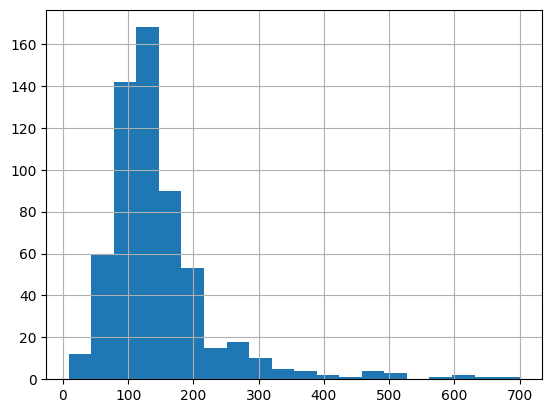

In [328]:
df["LoanAmount"].hist(bins=20)

In [329]:
df["LoanAmount_log"]=np.log(df["LoanAmount"])

<AxesSubplot: >

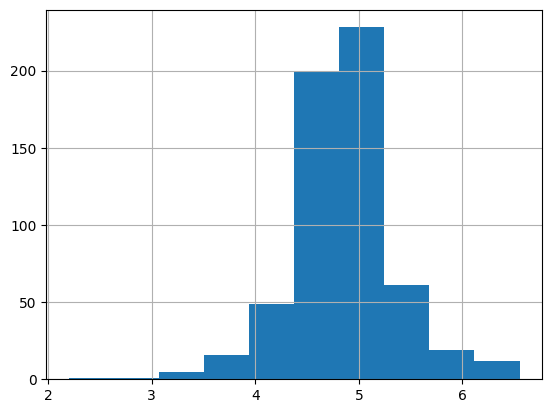

In [330]:
df["LoanAmount_log"].hist()

In [331]:
df["Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["Income_log"]=np.log(df["Income"])

<AxesSubplot: >

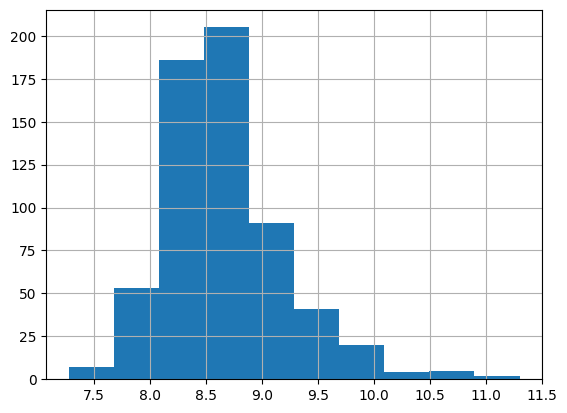

In [332]:
df["Income_log"].hist()

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     592 non-null    float64
 14  Income             614 non-null    float64
 15  Income_log         614 non-null    float64
dtypes: float64(7), int64(1), o

In [334]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
Income                0
Income_log            0
dtype: int64

In [335]:
df.Gender.mode()

0    Male
Name: Gender, dtype: object

In [336]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["LoanAmount"]=df["LoanAmount"].fillna(df.LoanAmount.mean())

In [337]:
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["LoanAmount_log"]=df["LoanAmount_log"].fillna(df.LoanAmount.mean())

In [338]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Income               0
Income_log           0
dtype: int64

In [339]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"].values

In [340]:
df.head(1).T.reset_index()

,index,0
0,Loan_ID,LP001002
1,Gender,Male
2,Married,No
3,Dependents,0
4,Education,Graduate
5,Self_Employed,No
6,ApplicantIncome,5849
7,CoapplicantIncome,0.0
8,LoanAmount,146.412162
9,Loan_Amount_Term,360.0


In [343]:
x=x.drop("Loan_ID",axis=1)

In [346]:
x["Dependents"].replace({"3+":3},inplace=True)

In [347]:
x["Dependents"].unique()


array([0, 1, 2, 3], dtype=int64)

<AxesSubplot: xlabel='Gender', ylabel='count'>

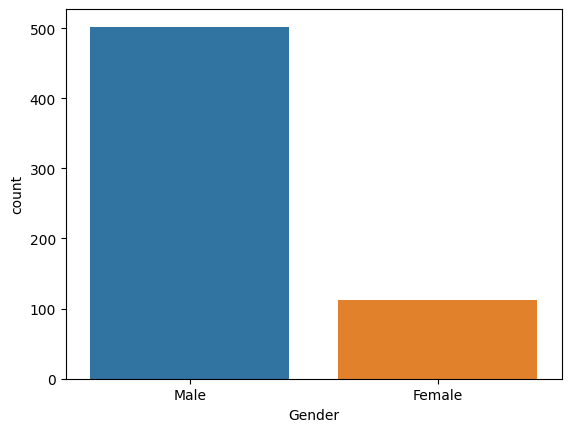

In [ ]:
import seaborn as sns
sns.countplot(x="Gender",data=df)

<AxesSubplot: xlabel='Married', ylabel='count'>

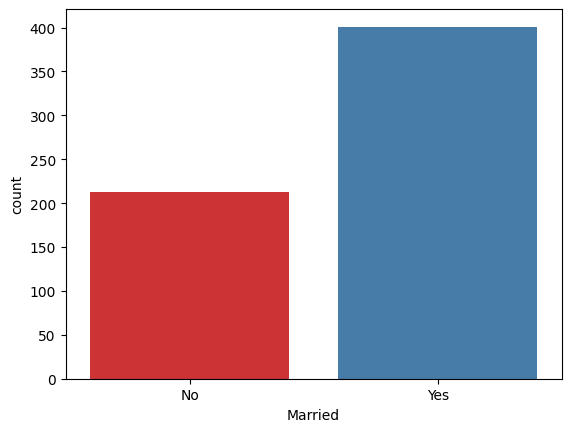

In [ ]:
sns.countplot(x="Married",data=df,palette="Set1")


<AxesSubplot: xlabel='Dependents', ylabel='count'>

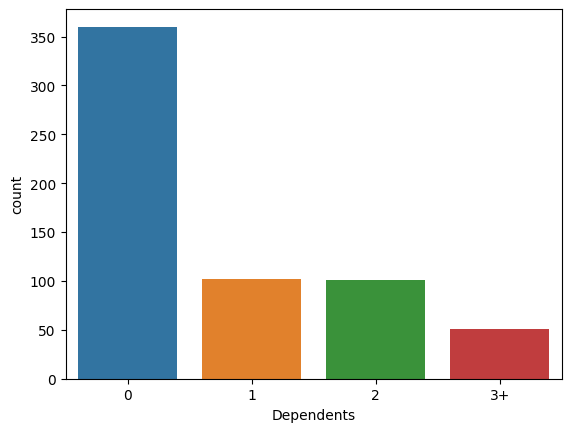

In [348]:
sns.countplot(x="Dependents",data=df)


In [349]:
x["Dependents"].unique()

array([0, 1, 2, 3], dtype=int64)

In [350]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [352]:
X_train



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Income,Income_log
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,4.875197,5858.0,8.675564
533,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,1.0,Semiurban,5.278115,11250.0,9.328123
452,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,5.003946,5681.0,8.644883
355,Female,No,0,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,4.753590,3813.0,8.246172
266,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,5.010635,6095.0,8.715224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,4.382027,4403.0,8.390041
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,5.855072,23809.0,10.077819
359,Male,Yes,3,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,5.298317,8334.0,9.028099
192,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,5.075174,6033.0,8.705000


In [401]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB


# Create a ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), [0,1,2,3,4,9,10])  # Specify the columns to one-hot encode
    ],
    remainder="passthrough"  # Pass through the other columns
)

# Create classifiers

GaussianNB=GaussianNB()
svm = SVC(C=5,gamma=2,probability=True)
BaggingClassifier=BaggingClassifier(svm)
gradient_boosting = GradientBoostingClassifier(learning_rate=0.05,n_estimators=200,max_depth=7)
knn=KNeighborsClassifier(n_neighbors=3,leaf_size=4,algorithm="ball_tree")
LR=LogisticRegression(max_iter=1000)
# Create a VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[("lr",LR),("gradient",gradient_boosting),("svm",svm),("BaggingClassifier",BaggingClassifier),("GaussianNB",GaussianNB)],
    voting="hard"
)

# Create a Pipeline
pipe = Pipeline([("ct", ct), ("voting", voting_classifier)])

# Fit the pipeline to your data
pipe.fit(X_train, Y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.8292682926829268
